### Uber_DataSet Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('uber_dataset.csv')
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [2]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [3]:
data.info()  # finding how many rows and columns and which dtype using chekcing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
data.shape

(1156, 7)

## Data Processing and Cleaning 

## 1. Check is there any missing values or not

In [155]:
data.isnull().sum() #507
#data.isnull().sum().sum()

START_DATE         0
END_DATE           0
CATEGORY           0
START              0
STOP               0
MILES              0
PURPOSE            0
Date               0
Time               0
Day_night_rides    0
Month              0
Day                0
dtype: int64

In [12]:
data['PURPOSE'].fillna('NOT', inplace=True)
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
#If a value cannot be converted to a valid datetime it will be replaced with NaT (Not a Time), which represents missing or null datetime values
data['START_DATE']=pd.to_datetime(data['START_DATE'], errors='coerce')    
#Ignore then the original value remains unchanged in the column, and no error is raised.
#Invalid or unparseable values are silently converted to NaT without raising an error.

In [6]:
data['END_DATE']=pd.to_datetime(data['END_DATE'], errors='coerce')

In [7]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    1155 non-null   object        
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


## How many rides occurred on each day?

In [14]:
daily_rides = data['Date'].value_counts().sort_index()
print(daily_rides.sum())

421


## What are the most popular pickup locations?

In [10]:
popular_pickups = data['START'].value_counts()
print(popular_pickups.head(10)) 

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64


## What are the most popular dropoff locations?

In [59]:
popular_dropoffs = data['STOP'].value_counts()
print(popular_dropoffs.head(10))  

STOP
Cary                92
Morrisville         40
Whitebridge         28
Unknown Location    21
Durham              19
Raleigh             11
Apex                 8
Berkeley             8
Edgehill Farms       7
Westpark Place       7
Name: count, dtype: int64


## Total no of unique start location

In [11]:
unique_start_locations = data['START'].unique()
total_unique_start_locations = len(unique_start_locations)
print("Total number of unique start locations:", total_unique_start_locations)

Total number of unique start locations: 178


In [26]:
## Total no of unique stop location

In [27]:
unique_start_locations = data['STOP'].unique()
total_unique_start_locations = len(unique_start_locations)
print("Total number of unique start locations:", total_unique_start_locations)

Total number of unique start locations: 189


In [13]:
## Creating a date and time columns
from datetime import datetime
data['Date']= pd.DatetimeIndex(data['START_DATE']).date
data['Time']= pd.DatetimeIndex(data['START_DATE']).hour
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaN,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaN,NaN


In [29]:
data['Day_night_rides']=pd.cut(x=data['Time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_night_rides
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [30]:
data.dropna(inplace=True)

In [32]:
data.shape

(414, 10)

In [61]:
data.describe()

,START_DATE,MILES,Time
count,414,414.000000,414.000000
mean,2016-07-01 16:40:05.942029056,9.119807,15.241546
min,2016-01-01 21:11:00,0.500000,1.000000
25%,2016-03-12 11:31:30,2.725000,12.000000
50%,2016-07-04 19:11:30,5.700000,16.000000
75%,2016-10-10 23:28:30,9.900000,18.000000
max,2016-12-12 20:48:00,174.200000,23.000000
std,NaN,16.497271,4.277268


## Data vizualization

## What is Average lenght of trip >>

Average length of the trip: 9.119806763285025


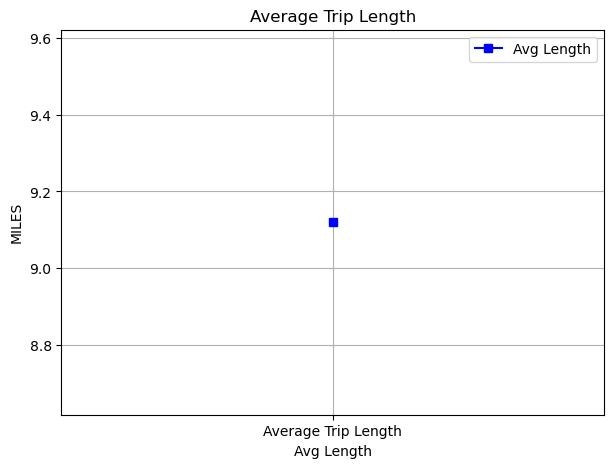

In [74]:
average_trip_length = data['MILES'].mean()
print("Average length of the trip:", average_trip_length)

# Plotting the average trip length using a line chart
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(["Average Trip Length"], [average_trip_length], marker='s', color='blue', label="Avg Length")
plt.ylabel("MILES")
plt.xlabel("Avg Length")
plt.title("Average Trip Length")
plt.legend()
plt.grid(True)  # Optional: Adds grid lines for better visualization
plt.show()

## Business vs Personal 

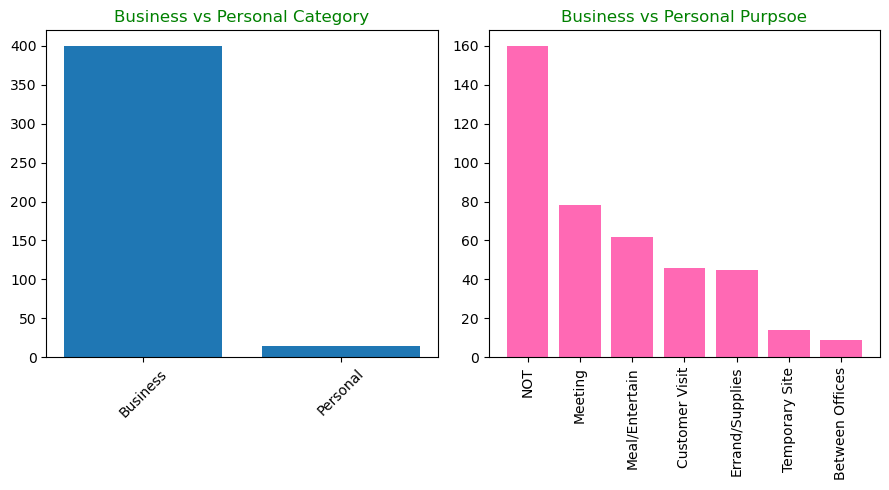

In [100]:
# Create a bar chart
plt.figure(figsize=(9, 5))
## Category bar chart
plt.subplot(1, 2, 1)
category_counts = data['CATEGORY'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title("Business vs Personal Category", color='g')
# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.subplot(1,2,2)
purpose_counts = data['PURPOSE'].value_counts()
plt.bar(purpose_counts.index, purpose_counts.values, color='hotpink')
# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.title("Business vs Personal Purpsoe", color='g')
plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

## Average number of rides per month?

Average number of rides per month: 34.5


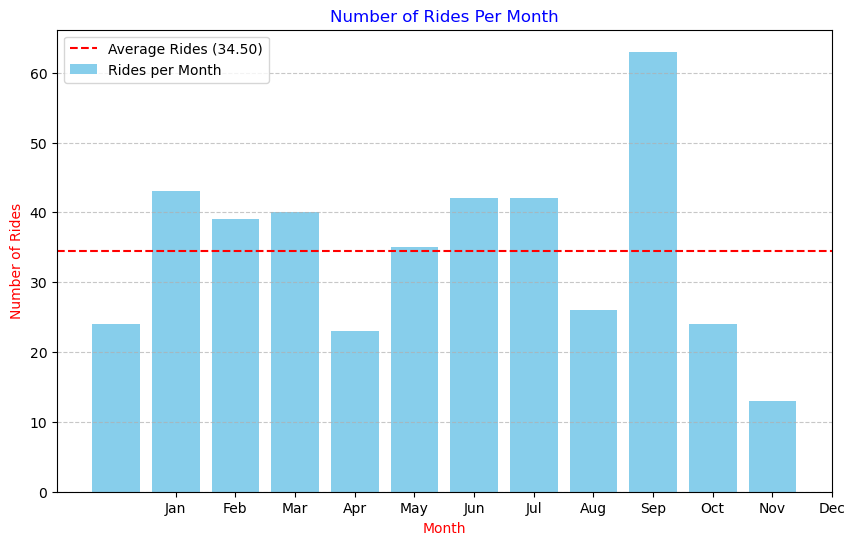

In [87]:
rides_per_month = data['Month'].value_counts().sort_index()
average_rides = rides_per_month.mean()
print(f"Average number of rides per month: {average_rides}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(rides_per_month.index, rides_per_month.values, color='skyblue', label='Rides per Month')
plt.axhline(average_rides, color='red', linestyle='--', label=f'Average Rides ({average_rides:.2f})')

# Add labels and title
plt.xlabel('Month', color='r')
plt.ylabel('Number of Rides', color='r')
plt.title('Number of Rides Per Month', color='blue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Count of "Day" vs "Night" rides

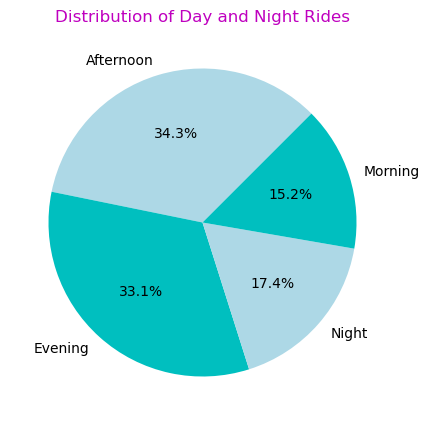

In [110]:
# Plot the pie chart
day_night_counts = data['Day_night_rides'].value_counts()
plt.figure(figsize=(7,5))
plt.pie(day_night_counts, labels=day_night_counts.index, autopct='%1.1f%%', startangle=45, colors=['lightblue', 'c'])

# Title for the chart
plt.title('Distribution of Day and Night Rides', color='m')
plt.show()

###  On which days of the week do people book Uber rides the most? and month wise ?

In [130]:
data['Month'] = pd.DatetimeIndex(data['START_DATE']).month

# Define the mapping of month numbers to labels
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map the month numbers to their labels
data['Month'] = data['Month'].map(month_label)

# Count the occurrences of each month
mon = data['Month'].value_counts(sort=False)
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_night_rides,Month,Day
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


In [161]:
data['Day']=data.START_DATE.dt.weekday
data_label={
    0:'Mon',1:'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
data['Day']=data['Day'].map(data_label)
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_night_rides,Month,Day
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,Dec,Mon
1044,2016-12-12 13:36:00,12-12-2016 13:51,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,Dec,Mon
1045,2016-12-12 14:26:00,12-12-2016 14:39,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,Dec,Mon
1046,2016-12-12 17:51:00,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,Dec,Mon


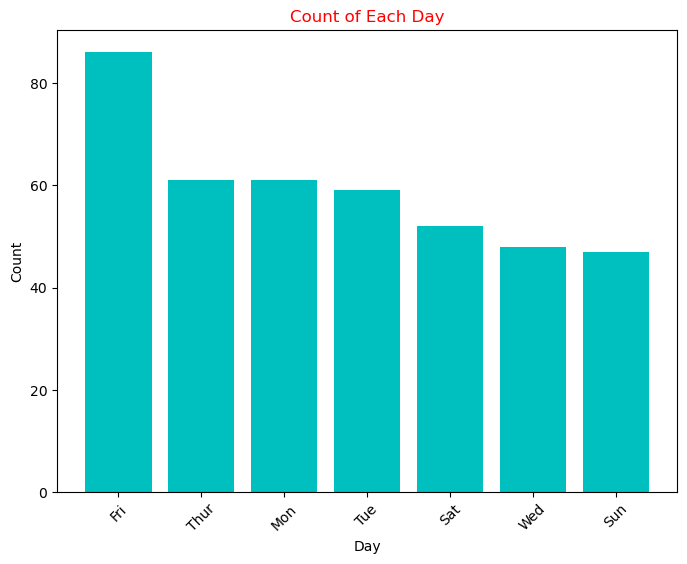

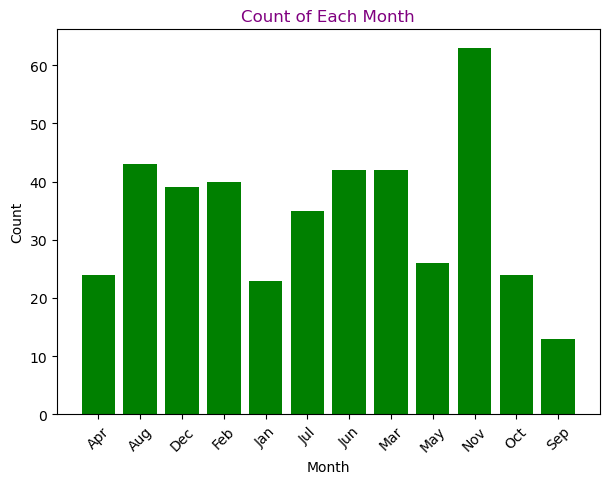

In [153]:
# Create a bar chart on weekdays
data_label = data['Day'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(data_label.index, data_label.values, color='c')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Each Day', color='r')
plt.xticks(rotation=45)
plt.show()


## Create a bar chart on months
data_label = data['Month'].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(data_label.index, data_label.values, color='green')
# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Month',color='purple')
plt.xticks(rotation=45)
plt.show()

## How many miles do people usually book a cab for through Uber

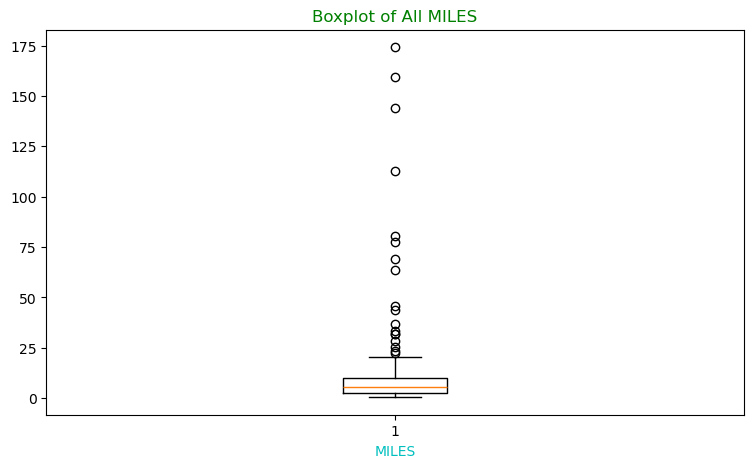

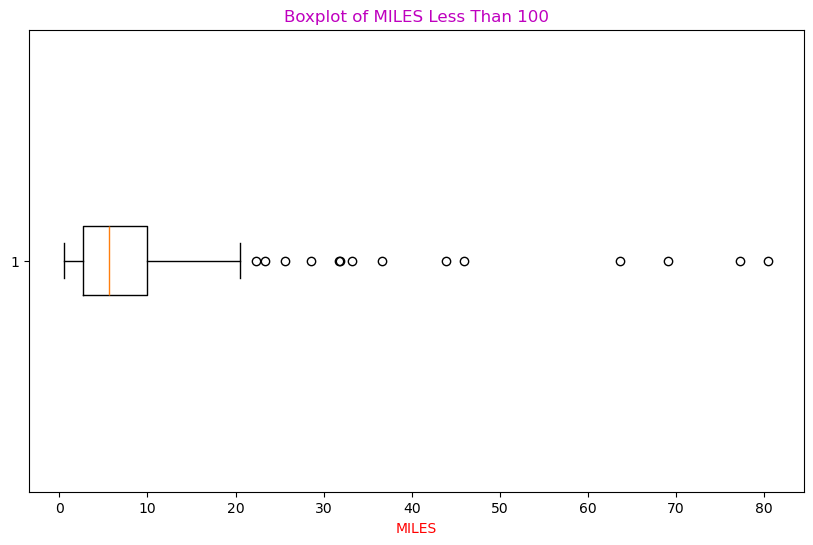

In [120]:
# Create the first box plot for all MILES
plt.figure(figsize=(9,5 ))
plt.boxplot(data['MILES'], vert=True)
plt.title('Boxplot of All MILES', color='g')
plt.xlabel('MILES',color='c')
plt.show()

# Create the second box plot for MILES < 100
plt.figure(figsize=(10, 6))
plt.boxplot(data[data['MILES'] < 100]['MILES'], vert=False)
plt.title('Boxplot of MILES Less Than 100', color='m')
plt.xlabel('MILES', color='r')
plt.show()